### Summary: JEE-Mains Dummy Data Analysis (2013-2025) - Top 30 Ranks (General/Reserved) categories
##### File Name: jee_mains_2013_to_2025_top_30_ranks.csv
##### Columns: 
        Year                 int64
        Exam_Date           object
        Name                object
        Category            object
        Sex                 object
        State               object
        Maths_Marks          int64
        Physics_Marks        int64
        Chemistry_Marks      int64
        Total_Marks          int64
        Rank                 int64
        Percentile         float64
##### Tasks Performed: 
        EDA (Exploratory Data Analaysis), Few Queries on DataFrame asking for specific outputs

#### EDA (Exploratory Data Analysis)
    Steps
    1. Data Ingestion
    2. Data cleanup and fill null values
    3. Descriptive Statistics of Data
    4. Data Visualization
        Univariate                              - Analyze Single Column
            Categorical - countplot
            Continuous - Histogram
        Bivariate                               - Analyze Two Columns
            Categorical vs Categorical   - scatterplot, regplot
            Categorical vs Continuous    - boxplot
            Continuous vs Continuous     - crosstab, heatmap
        Multivariate                            - Analyze multiple Columns
            correlation plot
            pairplot    

In [281]:
import pandas as pd
path = r"D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\jee-mains\jee_mains_2013_to_2025_top_30_ranks.csv"
df = pd.read_csv(path, keep_default_na=False, na_values=["", "NA"])
df.columns
df.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
0,2013,2013-04-21,Tristan Bhandari,General,F,Uttar Pradesh,75,83,48,206,78,51.572327


#### 1. Data Ingestion

In [3]:
import pandas as pd
# /kaggle/input/jee-mains-dummy-data-2013-2025-top-30-ranks/jee_mains_2013_to_2025_top_30_ranks.csv
path = r"D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\jee-mains\jee_mains_2013_to_2025_top_30_ranks.csv"
df = pd.read_csv(path, keep_default_na=False, na_values=["", "NA"])
df.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
0,2013,2013-04-21,Tristan Bhandari,General,F,Uttar Pradesh,75,83,48,206,78,51.572327


#### 2. Data cleanup and fill null values

In [4]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [5]:
# Check null values
df.isna().sum().sum()

np.int64(0)

In [6]:
# No Cleanup required....

#### 3. Descriptive Statistics of Data

In [7]:
categorical = list(df.columns[df.dtypes == 'object'])
continuous = list(df.columns[df.dtypes != 'object'])
cat = categorical
cont = continuous
cat, cont

(['Exam_Date', 'Name', 'Category', 'Sex', 'State'],
 ['Year',
  'Maths_Marks',
  'Physics_Marks',
  'Chemistry_Marks',
  'Total_Marks',
  'Rank',
  'Percentile'])

#### 4. Data Visualization

##### Univariate Analysis
    Univariate  - Analyze Single Column
            Categorical - countplot
            Continuous - Histogram

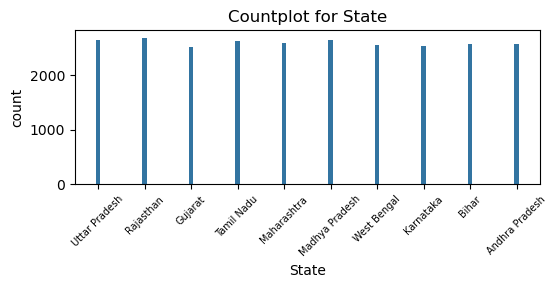

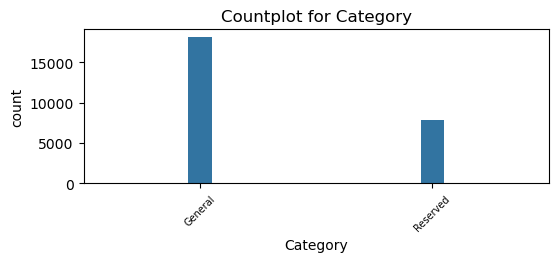

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Univariate Analysis - Categorical Columns
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(6, 2))
    sns.countplot(df, x=col, width=.1)
    plt.title(f'Countplot for {col}')
    plt.xticks(rotation=45, fontsize=7)
    plt.show()

plot_count(df, 'State')
plot_count(df, 'Category')

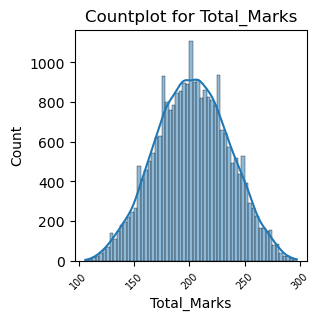

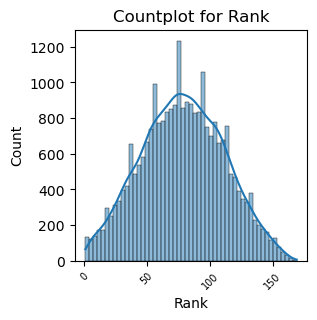

In [279]:
# Univariate Analysis - Continuous Columns
def plot_reg(df:pd.DataFrame, col:str):
    plt.figure(figsize=(3, 3))
    sns.histplot(df, x=col, kde=True)
    plt.title(f'Countplot for {col}')
    plt.xticks(rotation=45, fontsize=7)
    plt.show()

plot_reg(df, "Total_Marks")
plot_reg(df, "Rank")
    

##### Bivariate Analysis
    Univariate  - Analyze 2 Columns
            continuous vs continuous -> scatterplot, regplot
			categorical vs con -> boxplot
			categorical vs categorical -> crosstab heatmap

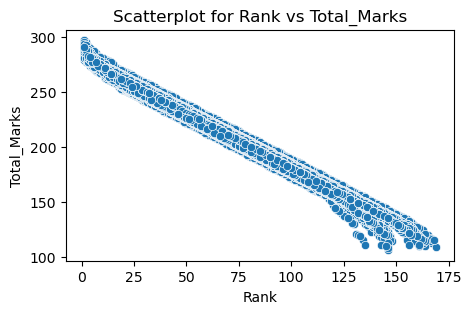

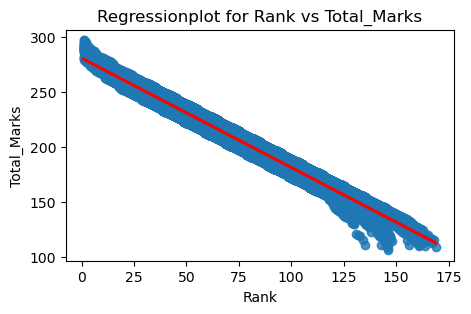

In [277]:
# continuous vs continuous -> scatterplot, regplot
def plot_scatter(df: pd.DataFrame, x_col: str, y_col:str):
    plt.figure(figsize=(5,3))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Scatterplot for {x_col} vs {y_col}')
    plt.show()
    
def plot_reg(df: pd.DataFrame, x_col: str, y_col:str):
    plt.figure(figsize=(5,3))
    sns.regplot(data=df, x=x_col, y=y_col, line_kws={"color":"red"})
    plt.title(f'Regressionplot for {x_col} vs {y_col}')
    plt.show()
    
# categorical vs con -> boxplot
def plot_box(df: pd.DataFrame, x_col: str, y_col: str):
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x=x_col, y=y_col)
    plt.title(f'Scatterplot for {x_col} vs {y_col}')
    plt.xticks(rotation=90)
    plt.show()

# continuous vs continuous -> scatterplot, regplot
plot_scatter(df,  'Rank', 'Total_Marks',)
plot_reg(df,  'Rank', 'Total_Marks',)



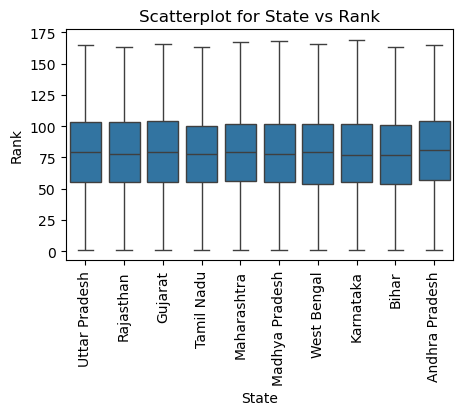

In [278]:
# categorical vs con -> boxplot
plot_box(df, 'State', 'Rank')

#### 3. categorical vs categorical - crosstab, heatmap

In [12]:
cat, cont

(['Exam_Date', 'Name', 'Category', 'Sex', 'State'],
 ['Year',
  'Maths_Marks',
  'Physics_Marks',
  'Chemistry_Marks',
  'Total_Marks',
  'Rank',
  'Percentile'])

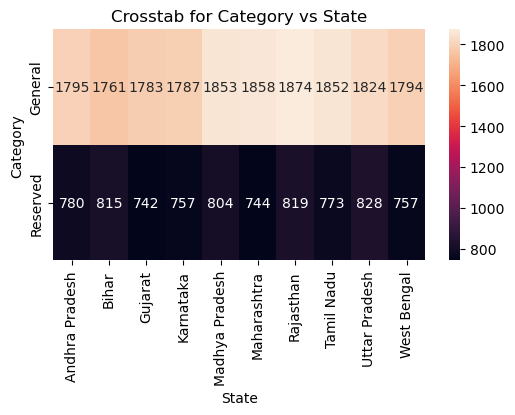

In [272]:
ctab = pd.crosstab(df['Category'] ,df['State'])
plt.figure(figsize=(6,3))
sns.heatmap(data=ctab,annot=True, fmt="d")
plt.title('Crosstab for Category vs State')
plt.show()

#### Multivariate - Analyze more than 2 column(s)
    1. correlation plot
    2. pair plot

In [238]:
corr = df.corr(numeric_only=True)
corr.head(1)

,Year,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
Year,1.0,-0.000204,0.007902,-0.004558,0.001612,-0.01637,0.003935


In [15]:
corr.loc["Total_Marks", "Rank"]

np.float64(-0.9897231968038916)

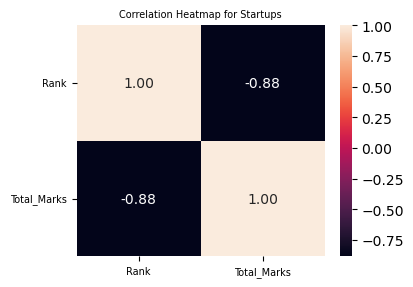

In [273]:
plt.figure(figsize=(4, 3))
sns.heatmap(data=corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap for Startups', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(rotation=360, fontsize=7)
plt.show()

#### 2. pair plot

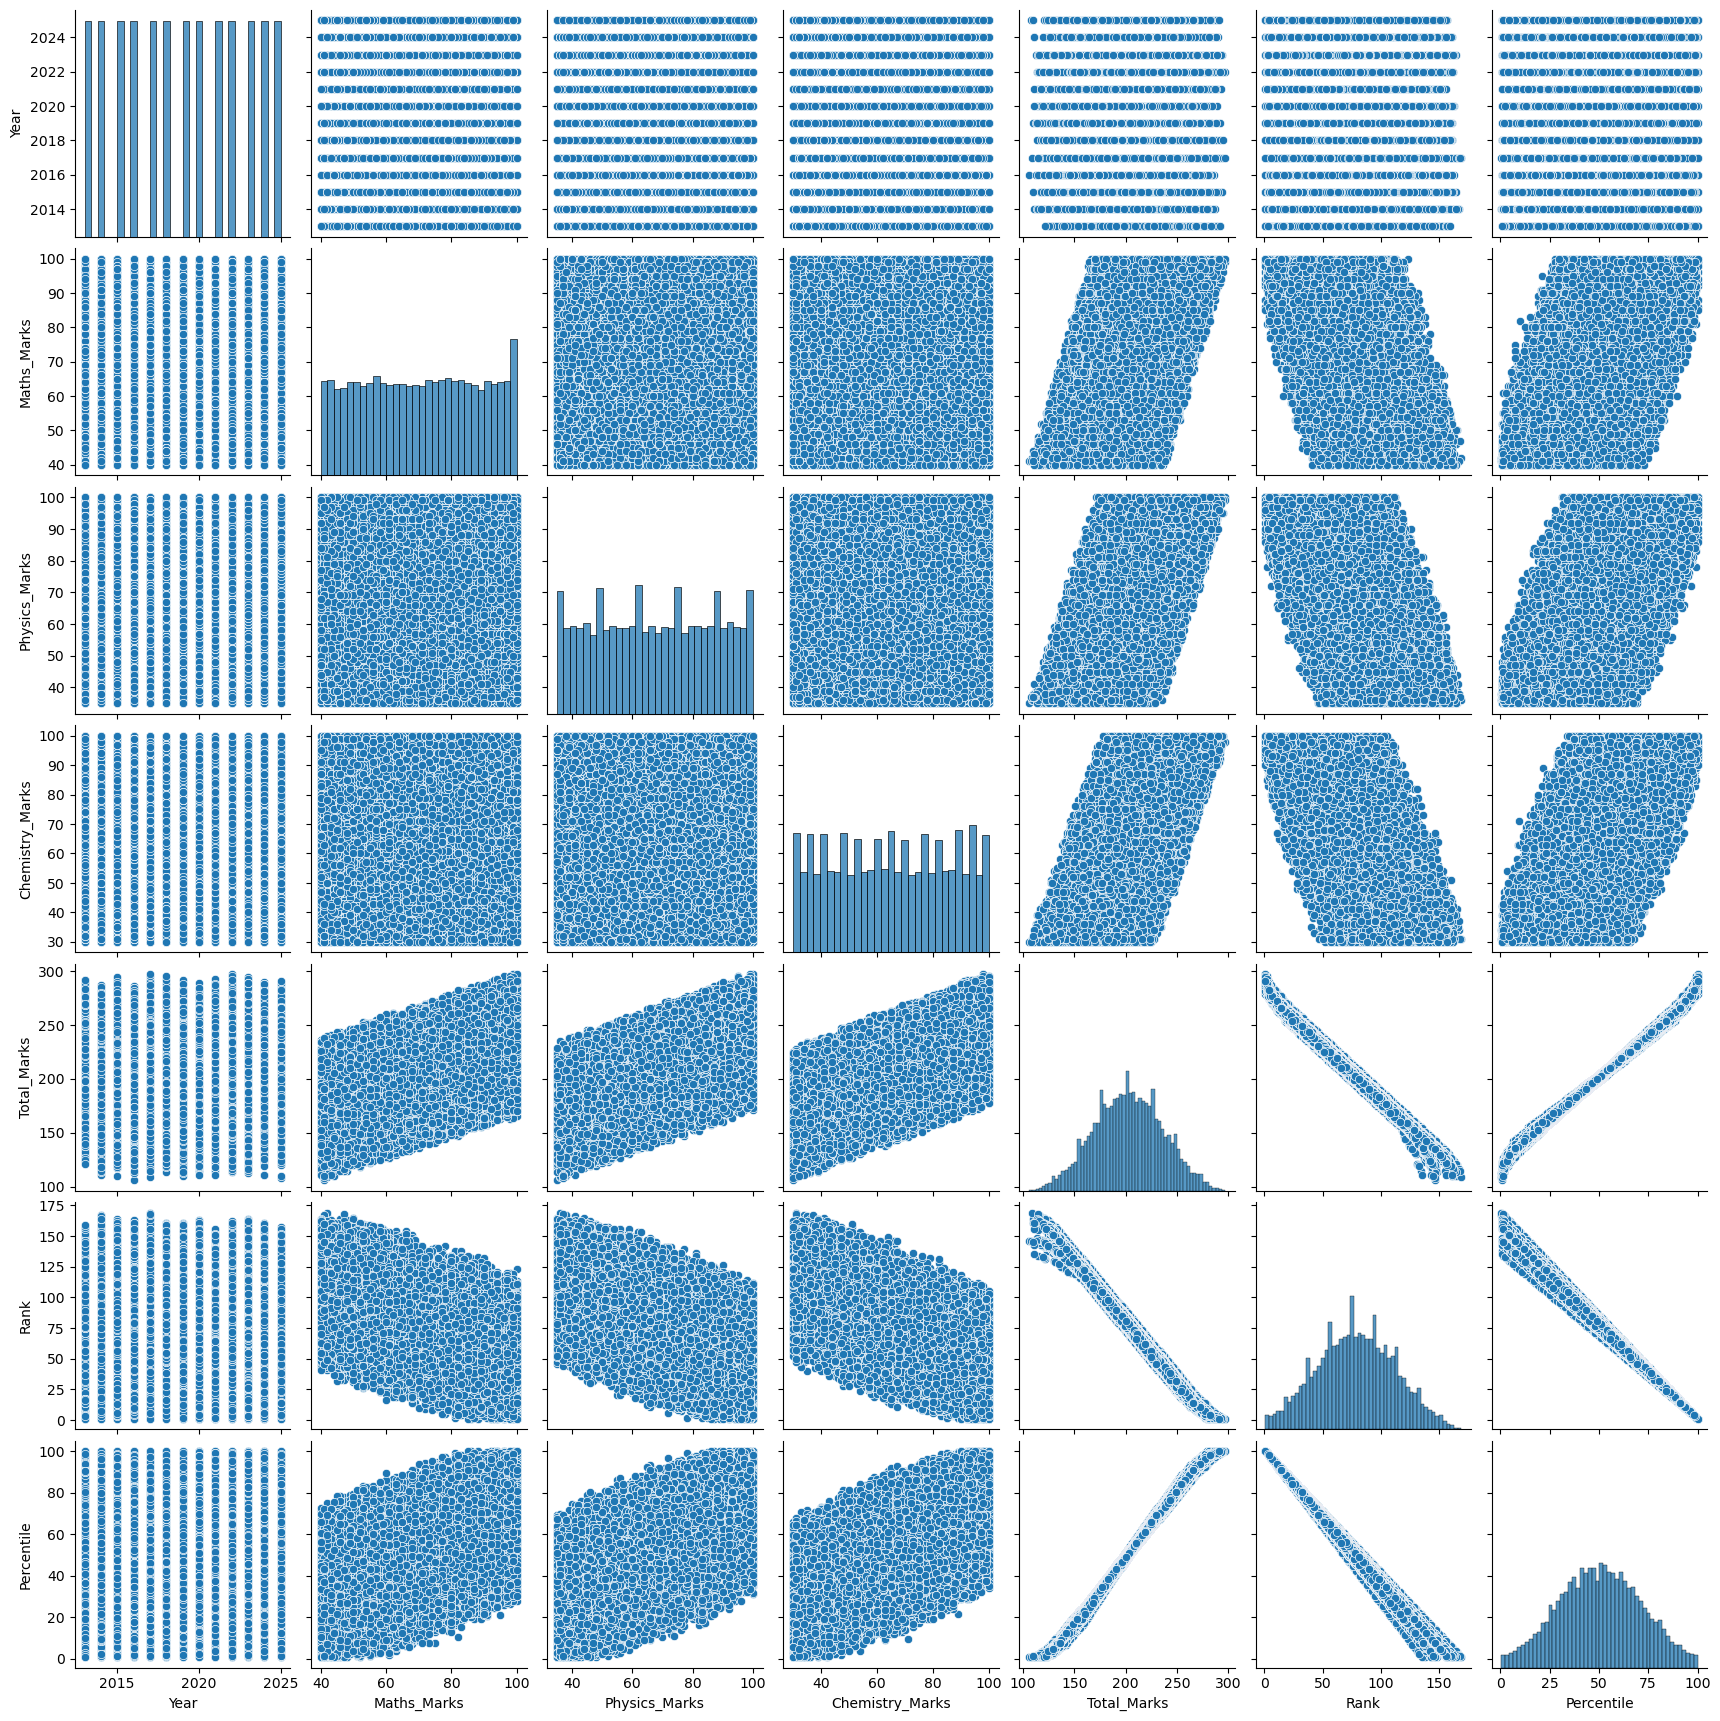

In [17]:
sns.pairplot(data=df[cont])

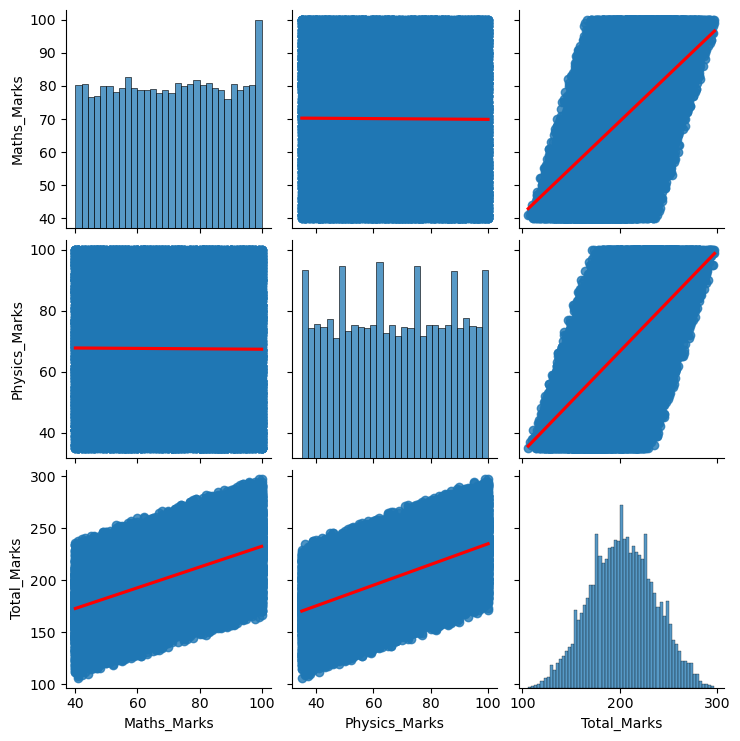

In [18]:
cont_ = ['Maths_Marks', 'Physics_Marks',  'Total_Marks']
sns.pairplot(df[cont_], kind="reg", plot_kws={"line_kws":{"color":"red"}})

##### Get bottom 3 ranks per category for year 2023

In [237]:
# Get bottom 3 ranks per category for year 2023
general_category_df = df.query("Year == 2023 and Category == 'General' ").nlargest(3, "Rank")
reserved_category_df = df.query("Year == 2023 and Category == 'Reserved' ").nlargest(3, "Rank")
pd.concat([general_category_df, reserved_category_df]).head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
20225,2023,2023-04-20,Meera Sani,General,F,Gujarat,40,35,39,114,164,0.609756


##### Get top 3 ranks per category for years 2024, 2025

In [269]:
df.query("1 <= Rank <= 3  and 2024 <= Year <= 2025").groupby(['Year', 'Category', 'Rank', 'Name', 'Percentile']).size().head(1)

Year  Category  Rank  Name           Percentile
2024  General   1     Ishanvi Ratta  100.0         1
dtype: int64

### Graphs with Sliced DF and different background colours

In [21]:
# Get Categories and Continuous variables
cat, cont

(['Exam_Date', 'Name', 'Category', 'Sex', 'State'],
 ['Year',
  'Maths_Marks',
  'Physics_Marks',
  'Chemistry_Marks',
  'Total_Marks',
  'Rank',
  'Percentile'])

<Figure size 400x300 with 0 Axes>

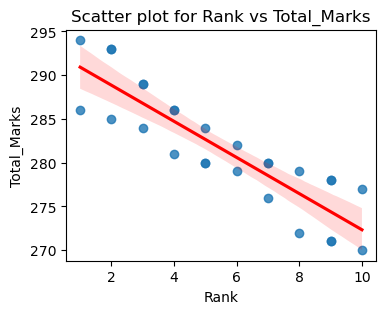

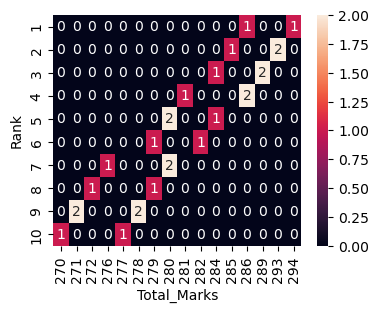

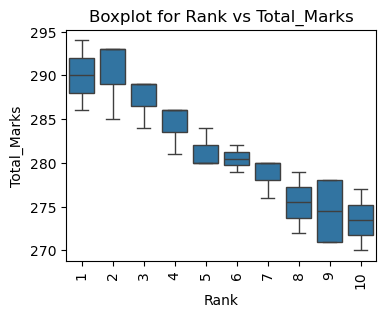

In [268]:
# Get Top 10 ranker Year, Category, Rank, Names and  for Year 2023
top_10_ranks_for_year_2023 = (
    df.query("Year == 2023 and 1 <= Rank <= 10")[["Year", "Category", "Rank", "Name","Total_Marks"]]
    .sort_values(by = ["Year", "Category", "Rank", "Name"])
)
# print(top_10_ranks_for_year_2023)
def scatter_plot(df: pd.DataFrame, x:str, y:str):
    plt.figure(figsize=(4,3))
    plt.title(f'Scatter plot for {x} vs {y}')
    sns.scatterplot(data=top_10_ranks_for_year_2023, x=x, y=y)
    plt.xticks(rotation=90)
    plt.show()
    
def reg_plot(df: pd.DataFrame, x:str, y:str):
    plt.figure(figsize=(4,3))
    plt.title(f'Scatter plot for {x} vs {y}')
    sns.regplot(data=top_10_ranks_for_year_2023, x=x, y=y, line_kws={"color":"red"})
    plt.show()

def box_plot(df: pd.DataFrame, x:str, y:str):
    plt.figure(figsize=(4,3))
    plt.title(f'Boxplot for {x} vs {y}')
    sns.boxplot(data=df, x=x, y=y)
    plt.xticks(rotation=90)
    plt.show()

def crosstab_heatmap_plot(df: pd.DataFrame, x:str, y:str):
    plt.figure(figsize=(4,3))
    ctab = pd.crosstab(df[x], df[y])
    sns.heatmap(data=ctab, annot=True, fmt="d")
    plt.show()

plt.figure(figsize=(4,3))
reg_plot(top_10_ranks_for_year_2023, 'Rank', 'Total_Marks')
crosstab_heatmap_plot(top_10_ranks_for_year_2023, 'Rank', 'Total_Marks')
box_plot(top_10_ranks_for_year_2023, 'Rank', 'Total_Marks')

##### Multivariate Analysis - Multiple Columns

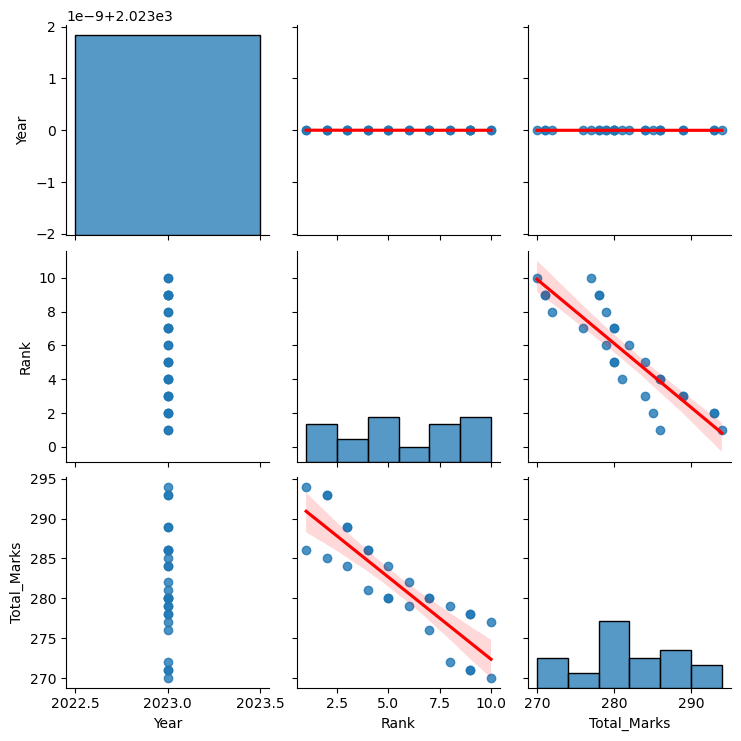

In [260]:
# correlation 
corr = top_10_ranks_for_year_2023[['Rank', 'Total_Marks']].corr()
corr
sns.pairplot(top_10_ranks_for_year_2023, kind="reg", plot_kws={"line_kws":{"color":"red"}})

In [235]:
## Get Maths_Marks average by Rank per year
maths_marks_average_by_rank_per_year = (
    df.groupby(by = ["Year", "Rank", "Total_Marks"]).agg({"Maths_Marks":"mean"})
    
)
maths_marks_average_by_rank_per_year.head(1), type(maths_marks_average_by_rank_per_year)

(                       Maths_Marks
 Year Rank Total_Marks             
 2013 1    292                 99.5,
 pandas.core.frame.DataFrame)

In [25]:
## Get Top 3 Maths_Marks, Physics_Marks, Chemistry_Marks average by Rank per year
top_3_avg_marks_by_rank_per_year = (
    df.query("1 <= Rank <=3")
    .groupby(by = ["Year", "Rank"])
    .agg({"Maths_Marks":"mean", "Physics_Marks":"mean", "Chemistry_Marks":"mean"})
    .round(2)
)
top_3_avg_marks_by_rank_per_year.head(1)

,,Maths_Marks,Physics_Marks,Chemistry_Marks
Year,Rank,,,
2013,1,99.5,99.0,93.5


In [233]:
## Get Top 3 for Years 2023 and 2017 Maths_Marks, Physics_Marks, Chemistry_Marks average by Rank per year
top_3_avg_marks_by_rank_per_year = (
    df.query("1 <= Rank <=3 and (Year == 2023 or Year== 2017)")
    .groupby(by = ["Year", "Rank"])
    .agg({"Maths_Marks":"mean", "Physics_Marks":"mean", "Chemistry_Marks":"mean"})
    .round(2)
)
top_3_avg_marks_by_rank_per_year.head(1)

,,Maths_Marks,Physics_Marks,Chemistry_Marks
Year,Rank,,,
2017,1,95.5,99.5,98.5


In [232]:
## Get Top 3 for Year 2017 Maths_Marks, Physics_Marks, Chemistry_Marks average by Rank per state
top_3_avg_marks_by_rank_per_state = (
    df.query("1 <= Rank <=3 and (Year== 2017)")
    .groupby(by = ["State", "Rank"])
    .agg({"Maths_Marks":"mean", "Physics_Marks":"mean", "Chemistry_Marks":"mean"})
    .round(2)
)
top_3_avg_marks_by_rank_per_state.head(1)

,,Maths_Marks,Physics_Marks,Chemistry_Marks
State,Rank,,,
Andhra Pradesh,3,98.0,97.0,92.0


In [231]:
## Get Top 3 for Year 2017 Maths_Marks, Physics_Marks, Chemistry_Marks average by Category per state
top_3_avg_marks_by_category_per_state = (
    df.query("1 <= Rank <=3 and (Year== 2017)")
    .groupby(by = ["State", "Category"])
    .agg({"Maths_Marks":"mean", "Physics_Marks":"mean", "Chemistry_Marks":"mean"})
    .round(2)
)
top_3_avg_marks_by_category_per_state.head(1)

,,Maths_Marks,Physics_Marks,Chemistry_Marks
State,Category,,,
Andhra Pradesh,Reserved,98.0,97.0,92.0


In [29]:
## Get state, category, name, sex for Years and rank 1
details_of_rank_1 = (
    df.query(" Rank == 1")[["Year", "State", "Category", "Name", "Sex"]]
)
details_of_rank_1.shape

(29, 5)

In [214]:
## Get state, category, name, sex for Years and rank 1 to 3
details_of_rank_from_1_to_3 = (
    df.query(" 1 <= Rank <= 3")[["Year", "Rank", "Name", "Sex", "State", "Category", ]]
)
details_of_rank_from_1_to_3.head(1)

,Year,Rank,Name,Sex,State,Category
194,2013,1,Sachi Dubey,F,Rajasthan,Reserved


In [213]:
# Get top rank by state
top_rank_by_state = (
    df.loc[df.groupby("State")["Rank"].idxmin()].sort_values(by="State")
)
top_rank_by_state.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
1660,2013,2013-04-19,Yadavi Loke,General,F,Andhra Pradesh,99,98,95,292,1,100.0


In [211]:
# Get top rank by state and category
top_rank_by_state = (
    df.loc[df.groupby(by=["State", "Category"])["Rank"].idxmin()].sort_values(by=["State", "Category"])
)
top_rank_by_state.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
1660,2013,2013-04-19,Yadavi Loke,General,F,Andhra Pradesh,99,98,95,292,1,100.0


In [212]:
# Get bottom rank by state and category
bottom_rank_by_state = (
    df.loc[df.groupby(by=["State", "Category"])["Rank"].idxmax()].sort_values(by=["State", "Category"])
)
bottom_rank_by_state.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
3413,2014,2014-04-18,Sudiksha Sharaf,General,M,Andhra Pradesh,42,44,31,117,165,1.796407


In [215]:
# Get states by max rank 1 count
get_top_states_by_max_rank_1_count = (
    df.query("Rank ==1")
    .groupby(by=["State"])
    .size()
    .reset_index(name="Rank_1_count")
    .sort_values(by = "Rank_1_count", ascending=False)
)
get_top_states_by_max_rank_1_count.head(1)

,State,Rank_1_count
8,Uttar Pradesh,5


In [216]:
# Get top 3 states by max rank 1 count
get_top_3_states_by_max_rank_1_count = (
    df.query("Rank ==1")
    .groupby(by=["State"])
    .size()
    .reset_index(name="Rank_1_count")
    .sort_values(by = "Rank_1_count", ascending=False)
    .head(3)
)
get_top_3_states_by_max_rank_1_count.head(1)

,State,Rank_1_count
8,Uttar Pradesh,5


In [217]:
# Get top 3 states by max rank 1 count and reserved category
top_3_states_by_rank_1_count_for_reserved_cat = (
    df.query("Rank ==1 and Category == 'Reserved'")
    .groupby(by=["State"])
    .size()
    .reset_index(name="Rank_1_Reserved_category_count")
    .sort_values(by = "Rank_1_Reserved_category_count", ascending=False)
    .head(3)
)
top_3_states_by_rank_1_count_for_reserved_cat.head(1)

,State,Rank_1_Reserved_category_count
3,Karnataka,3


In [230]:
# Get female (Sex='F') top rank per year
female_top_rank_per_year = (
    df.loc[df.query("Sex == 'F'").groupby(by="Year")["Rank"].idxmin()]
)
female_top_rank_per_year.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
194,2013,2013-04-17,Sachi Dubey,Reserved,F,Rajasthan,100,100,92,292,1,100.0


In [229]:
# Get female (Sex='F') top rank by state
female_top_rank_by_state = (
    df.loc[df.query("Sex == 'F'").groupby(by=["State"])["Rank"].idxmin()]
)
female_top_rank_by_state.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
1660,2013,2013-04-19,Yadavi Loke,General,F,Andhra Pradesh,99,98,95,292,1,100.0


In [228]:
# Get female (Sex='F') top rank by state per year
female_top_rank_by_state_per_year = (
    df.loc[df.query("Sex == 'F'").groupby(by=["State", "Year"])["Rank"].idxmin()].sort_values(by = ["State", "Year"])
)
female_top_rank_by_state_per_year.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
1660,2013,2013-04-19,Yadavi Loke,General,F,Andhra Pradesh,99,98,95,292,1,100.0


In [227]:
# Get top Total_Marks by state
top_total_marks_by_state = (
    df.loc[df.groupby(by=["State"])["Total_Marks"].idxmax()].sort_values(by = ["State"])
)
top_total_marks_by_state.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
1660,2013,2013-04-19,Yadavi Loke,General,F,Andhra Pradesh,99,98,95,292,1,100.0


In [226]:
# Get top Total_Marks by state per year
top_total_marks_by_state_per_year = (
    df.loc[df.groupby(by=["State", "Year"])["Total_Marks"].idxmax()].sort_values(by = ["State", "Year"])
)
top_total_marks_by_state_per_year.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
1660,2013,2013-04-19,Yadavi Loke,General,F,Andhra Pradesh,99,98,95,292,1,100.0


In [225]:
# Get top 3 ranks by per year
top_3_ranks_per_year = (
    df.query(" 1 <= Rank <= 3 ")
)
top_3_ranks_per_year.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
194,2013,2013-04-17,Sachi Dubey,Reserved,F,Rajasthan,100,100,92,292,1,100.0


In [224]:
# Get 10 rank for year 2013 and 15 rank  for year 2017
rank_10_2013_n_rank_15_2017 = (
    pd.concat([df.query(" Rank == 10 and Year == 2013 "),df.query(" Rank == 15 and Year == 2017 ")])
)
rank_10_2013_n_rank_15_2017.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
1465,2013,2013-04-18,Zaitra Dey,Reserved,M,West Bengal,92,84,94,270,10,93.478261


In [223]:
# Get top 10 ranks for year 2013 and top 15 ranks for year 2017
top_10_ranks_2013_n_top_15_ranks_2017 = (
    pd.concat([df.query(" 1 <= Rank <= 10 and Year == 2013 "), df.query(" 1<= Rank <= 15 and Year == 2017 ")])
)
top_10_ranks_2013_n_top_15_ranks_2017.head(1)

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
35,2013,2013-04-21,Anjali Hans,General,F,Tamil Nadu,89,95,96,280,8,95.597484


In [221]:
# Get top 10 ranks for year 2013 by state 
top_10_ranks_for_2013_by_state = (
    df.query("Year == 2013 and 1 <= Rank <= 10 ")
    .groupby(by=["State"])
    .size()
    .reset_index(name="Top10RanksCount")
    .sort_values(by = "Top10RanksCount", ascending=False)
)
top_10_ranks_for_2013_by_state.head(1)

,State,Top10RanksCount
9,West Bengal,5


In [222]:
# Get top 10 ranks for year 2013 by state and Get top 15 ranks for year 2017 by state
top_10_ranks_for_2013_by_state = (
    df.query("Year == 2013 and 1 <= Rank <= 10 ")
    .groupby(by=["State"])
    .size()
    .reset_index(name="Top10RanksCount_2013")
    .sort_values(by = "Top10RanksCount_2013", ascending=False)
)

top_15_ranks_for_2017_by_state = (
    df.query("Year == 2017 and 1 <= Rank <= 15 ")
    .groupby(by=["State"])
    .size()
    .reset_index(name="Top15RanksCount_2017")
    .sort_values(by = "Top15RanksCount_2017", ascending=False)
)
pd.merge(top_10_ranks_for_2013_by_state, top_15_ranks_for_2017_by_state, on="State", how="outer").fillna(0).head(1)

,State,Top10RanksCount_2013,Top15RanksCount_2017
0,Andhra Pradesh,2,7


In [220]:
# Get top 10 ranks for year 2013 by state and general category and Get top 15 ranks for year 2017 by state and reserved category
top_10_ranks_for_2013_by_state_general = (
    df.query("Year == 2013 and 1 <= Rank <= 10 and Category == 'General' ")
    .groupby(by=["State"])
    .size()
    .reset_index(name="Top10RanksCount_2013_general")
    .sort_values(by = "Top10RanksCount_2013_general", ascending=False)
)

top_15_ranks_for_2017_by_state_reserved_cat = (
    df.query("Year == 2017 and 1 <= Rank <= 15 and Category == 'Reserved' ")
    .groupby(by=["State"])
    .size()
    .reset_index(name="Top15RanksCount_2017_reserved")
    .sort_values(by = "Top15RanksCount_2017_reserved", ascending=False)
)
pd.merge(top_10_ranks_for_2013_by_state_general, top_15_ranks_for_2017_by_state_reserved_cat, on="State", how="outer").fillna(0).head(1)

,State,Top10RanksCount_2013_general,Top15RanksCount_2017_reserved
0,Andhra Pradesh,2.0,3


#### Understanding LOC and ILOC with examples
##### LOC:  Label based access
######  df.loc[2]             # Access row with index label 2
######  df.loc[:, 'name']     # Access all rows, column labeled 'name'
######  df.loc[1:3, 'age']    # Rows with index labels 1 through 3 (inclusive), column 'age'
##### ILOC: Index based access
######  df.iloc[2]            # Access third row (index position 2)
######  df.iloc[:, 1]         # All rows, second column
######  df.iloc[1:3, 0]       # Second and third rows, first column

In [135]:
df.loc[2] # Access row with index label 2
df.loc[:, 'Name'] # Access all rows, column labeled 'name'
df.loc[1:3, 'State'] # Rows with index labels 1 through 3 (inclusive), column 'age'
df.loc[:1, df.columns[3]]

0    General
1    General
Name: Category, dtype: object

In [134]:
df.iloc[2] # Access third row (index position 2)
df.iloc[:, 1] # All rows, second column
df.iloc[1:3, 0] # Second and third rows, first column
df.iloc[:1, df.columns.get_loc('Category')]

0    General
Name: Category, dtype: object

##### Column Operations

In [258]:
df.columns.size
df.columns[3]
df.columns[:2]
df.columns.dtype
type(df.columns)
df.columns.tolist()
list( df.select_dtypes(include = 'number') ), list( df.columns[df.dtypes == 'number'] )

(['Year',
  'Maths_Marks',
  'Physics_Marks',
  'Chemistry_Marks',
  'Total_Marks',
  'Rank',
  'Percentile'],
 [])

In [257]:
import pandas as pd
path = r"D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\jee-mains\jee_mains_2013_to_2025_top_30_ranks.csv"
df = pd.read_csv(path, keep_default_na=False, na_values=["", "NA"])

##### Lambda Functions

In [243]:
df['Percentile'] = df['Percentile'].apply(lambda x: round(x, 2))
df['Percentile'].head(1)

0    51.57
Name: Percentile, dtype: float64

In [242]:
# axis = 0 -> Column wise calculation of the formula
# axis = 1 -> Row wise calculation of the formula
Total_Marks = df.apply(lambda row: row['Maths_Marks'] + row['Physics_Marks'] + row['Chemistry_Marks'], axis=1)
Total_Marks.head(1)

(0    206
 dtype: int64,
 0    206
 Name: Total_Marks, dtype: int64)

In [255]:
# axis = 0 -> Column wise calculation of the formula
# axis = 1 -> Row wise calculation of the formula
Total_Marks = df[['Maths_Marks','Physics_Marks', 'Chemistry_Marks' ]].apply(lambda col: col.sum(), axis=0)
Total_Marks, df[['Maths_Marks','Physics_Marks', 'Chemistry_Marks' ]].head(1)

(Maths_Marks        1821280
 Physics_Marks      1756114
 Chemistry_Marks    1691727
 dtype: int64,
    Maths_Marks  Physics_Marks  Chemistry_Marks
 0           75             83               48)

In [289]:
#### Get bottom 3 Total Marks for each Sex
df.groupby(by = "Sex").apply(lambda x: x.nsmallest(3, "Total_Marks"))

C:\Users\DEANESH\AppData\Local\Temp\ipykernel_3224\1395304570.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(by = "Sex").apply(lambda x: x.nsmallest(3, "Total_Marks"))


Year   Exam_Date              Name  Category Sex           State  \
Sex                                                                           
F   4672   2015  2015-04-20      Wridesh Mann   General   F   Uttar Pradesh   
    12068  2019  2019-04-21      Laban Ramesh   General   F  Andhra Pradesh   
    25966  2025  2025-04-19  Omkaar Nagarajan  Reserved   F       Rajasthan   
M   6848   2016  2016-04-18     Ekiya Thakkar  Reserved   M  Andhra Pradesh   
    24950  2025  2025-04-17   Mitesh Randhawa  Reserved   M     West Bengal   
    9242   2017  2017-04-19        Ekiya Kala   General   M       Karnataka   

           Maths_Marks  Physics_Marks  Chemistry_Marks  Total_Marks  Rank  \
Sex                                                                         
F   4672            41             38               31          110   164   
    12068           44             36               30          110   161   
    25966           41             37               32          110   145   
M   6848            41             35               30          106   146   
    24950           41             37               30          108   146   
    9242            42             36               31          109   169   

           Percentile  
Sex                    
F   4672     0.609756  
    12068    0.621118  
    25966    1.369863  
M   6848     0.684932  
    24950    0.684932  
    9242     0.591716

In [293]:
#### Get bottom 3 Total Marks for each Sex per year
df.groupby(by = ["Year", "Sex"], group_keys=False).apply(lambda x: x.nsmallest(3, "Total_Marks"))

C:\Users\DEANESH\AppData\Local\Temp\ipykernel_3224\312087366.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(by = ["Year", "Sex"], group_keys=False).apply(lambda x: x.nsmallest(3, "Total_Marks"))


,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
1952,2013,2013-04-15,Yatan Arora,General,F,West Bengal,43,42,36,121,159,0.628931
926,2013,2013-04-19,Bahadurjit Mallick,General,F,Uttar Pradesh,51,38,34,123,158,1.257862
1583,2013,2013-04-18,Jason Koshy,Reserved,F,Tamil Nadu,46,35,42,123,138,0.724638
186,2013,2013-04-19,Gayathri Pau,General,M,Maharashtra,52,38,33,123,158,1.257862
1911,2013,2013-04-15,Qushi Bora,General,M,Rajasthan,51,37,37,125,157,1.886792
...,...,...,...,...,...,...,...,...,...,...,...,...
25257,2025,2025-04-16,Anvi Dar,General,F,Tamil Nadu,44,46,30,120,157,0.636943
25124,2025,2025-04-19,Balveer Mangal,Reserved,F,Madhya Pradesh,48,38,35,121,144,2.054795
24950,2025,2025-04-17,Mitesh Randhawa,Reserved,M,West Bengal,41,37,30,108,146,0.684932
24817,2025,2025-04-16,Gauri Puri,General,M,Rajasthan,43,36,43,122,156,1.273885


In [294]:
#### Get top 15 Total Marks for each Sex per year
df.groupby(by = ["Year", "Sex"], group_keys=False).apply(lambda x: x.nlargest(15, "Total_Marks"))

C:\Users\DEANESH\AppData\Local\Temp\ipykernel_3224\2314337709.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(by = ["Year", "Sex"], group_keys=False).apply(lambda x: x.nlargest(15, "Total_Marks"))


,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
194,2013,2013-04-17,Sachi Dubey,Reserved,F,Rajasthan,100,100,92,292,1,100.000000
1660,2013,2013-04-19,Yadavi Loke,General,F,Andhra Pradesh,99,98,95,292,1,100.000000
1541,2013,2013-04-15,Dominic Bhattacharyya,General,F,Maharashtra,100,93,96,289,3,98.742138
1216,2013,2013-04-15,Mohini Patla,Reserved,F,Maharashtra,97,89,97,283,3,98.550725
160,2013,2013-04-15,Warda Raju,General,F,Andhra Pradesh,93,97,92,282,6,96.855346
...,...,...,...,...,...,...,...,...,...,...,...,...
25174,2025,2025-04-18,Vasudha Chadha,Reserved,M,Gujarat,91,84,100,275,7,95.890411
25487,2025,2025-04-21,Vasana Patil,General,M,West Bengal,96,97,82,275,9,94.904459
24617,2025,2025-04-19,Onveer Sampath,General,M,Rajasthan,97,80,97,274,10,94.267516
24286,2025,2025-04-15,Rehaan Borde,Reserved,M,Bihar,98,83,91,272,10,93.835616


In [298]:
#### Get top 3  and Bottom 3 Total Marks for each Sex per year
top_3_marks = df.groupby(by = ["Year", "Sex"], group_keys=False).apply(lambda x: x.nlargest(3, "Total_Marks"))
bottom_3_marks = df.groupby(by = ["Year", "Sex"], group_keys=False).apply(lambda x: x.nsmallest(3, "Total_Marks"))                                                                       
pd.concat([top_3_marks, bottom_3_marks])

C:\Users\DEANESH\AppData\Local\Temp\ipykernel_3224\2194661169.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_marks = df.groupby(by = ["Year", "Sex"], group_keys=False).apply(lambda x: x.nlargest(3, "Total_Marks"))
C:\Users\DEANESH\AppData\Local\Temp\ipykernel_3224\2194661169.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_3_marks = df.groupby(by = ["Year", "Sex"], group_keys=False).app

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
194,2013,2013-04-17,Sachi Dubey,Reserved,F,Rajasthan,100,100,92,292,1,100.000000
1660,2013,2013-04-19,Yadavi Loke,General,F,Andhra Pradesh,99,98,95,292,1,100.000000
1541,2013,2013-04-15,Dominic Bhattacharyya,General,F,Maharashtra,100,93,96,289,3,98.742138
347,2013,2013-04-17,Quincy Khatri,General,M,West Bengal,97,100,94,291,2,99.371069
1007,2013,2013-04-16,Onkar Bahl,General,M,Rajasthan,100,100,91,291,2,99.371069
...,...,...,...,...,...,...,...,...,...,...,...,...
25257,2025,2025-04-16,Anvi Dar,General,F,Tamil Nadu,44,46,30,120,157,0.636943
25124,2025,2025-04-19,Balveer Mangal,Reserved,F,Madhya Pradesh,48,38,35,121,144,2.054795
24950,2025,2025-04-17,Mitesh Randhawa,Reserved,M,West Bengal,41,37,30,108,146,0.684932
24817,2025,2025-04-16,Gauri Puri,General,M,Rajasthan,43,36,43,122,156,1.273885


In [300]:
#### Get top 3  and Bottom 3 ranks for each Category per year
top_3_marks = df.groupby(by = ["Year", "Category"], group_keys=False).apply(lambda x: x.nsmallest(3, "Rank"))
bottom_3_marks = df.groupby(by = ["Year", "Category"], group_keys=False).apply(lambda x: x.nlargest(3, "Rank"))                                                                       
pd.concat([top_3_marks, bottom_3_marks])

C:\Users\DEANESH\AppData\Local\Temp\ipykernel_3224\484608004.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_marks = df.groupby(by = ["Year", "Category"], group_keys=False).apply(lambda x: x.nsmallest(3, "Rank"))
C:\Users\DEANESH\AppData\Local\Temp\ipykernel_3224\484608004.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_3_marks = df.groupby(by = ["Year", "Category"], group_keys=False).a

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
1660,2013,2013-04-19,Yadavi Loke,General,F,Andhra Pradesh,99,98,95,292,1,100.000000
347,2013,2013-04-17,Quincy Khatri,General,M,West Bengal,97,100,94,291,2,99.371069
1007,2013,2013-04-16,Onkar Bahl,General,M,Rajasthan,100,100,91,291,2,99.371069
194,2013,2013-04-17,Sachi Dubey,Reserved,F,Rajasthan,100,100,92,292,1,100.000000
473,2013,2013-04-15,Yashvi Patil,Reserved,M,Bihar,98,91,98,287,2,99.275362
...,...,...,...,...,...,...,...,...,...,...,...,...
24817,2025,2025-04-16,Gauri Puri,General,M,Rajasthan,43,36,43,122,156,1.273885
25408,2025,2025-04-19,Abhimanyu Kalita,General,F,Gujarat,43,45,34,122,156,1.273885
24950,2025,2025-04-17,Mitesh Randhawa,Reserved,M,West Bengal,41,37,30,108,146,0.684932
25966,2025,2025-04-19,Omkaar Nagarajan,Reserved,F,Rajasthan,41,37,32,110,145,1.369863


In [301]:
#### Get top 3  and Bottom 3 ranks for each Category per State
top_3_marks = df.groupby(by = ["State", "Category"], group_keys=False).apply(lambda x: x.nsmallest(3, "Rank"))
bottom_3_marks = df.groupby(by = ["State", "Category"], group_keys=False).apply(lambda x: x.nlargest(3, "Rank"))                                                                       
pd.concat([top_3_marks, bottom_3_marks])

C:\Users\DEANESH\AppData\Local\Temp\ipykernel_3224\2978686856.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_marks = df.groupby(by = ["State", "Category"], group_keys=False).apply(lambda x: x.nsmallest(3, "Rank"))
C:\Users\DEANESH\AppData\Local\Temp\ipykernel_3224\2978686856.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_3_marks = df.groupby(by = ["State", "Category"], group_keys=Fals

,Year,Exam_Date,Name,Category,Sex,State,Maths_Marks,Physics_Marks,Chemistry_Marks,Total_Marks,Rank,Percentile
1660,2013,2013-04-19,Yadavi Loke,General,F,Andhra Pradesh,99,98,95,292,1,100.000000
14217,2020,2020-04-20,Panini Gala,General,F,Andhra Pradesh,94,97,98,289,1,100.000000
17906,2021,2021-04-21,Chakradhar Bassi,General,M,Andhra Pradesh,100,90,97,287,2,99.358974
15234,2020,2020-04-17,Balendra Dyal,Reserved,F,Andhra Pradesh,88,100,93,281,1,100.000000
14343,2020,2020-04-19,Idika Bail,Reserved,M,Andhra Pradesh,99,92,89,280,2,99.259259
...,...,...,...,...,...,...,...,...,...,...,...,...
7911,2016,2016-04-21,Yashvi Kibe,General,M,West Bengal,44,42,34,120,161,1.840491
2673,2014,2014-04-19,Charan Suri,General,F,West Bengal,53,35,35,123,160,4.790419
3244,2014,2014-04-17,George Taneja,Reserved,F,West Bengal,42,38,31,111,146,0.684932
24950,2025,2025-04-17,Mitesh Randhawa,Reserved,M,West Bengal,41,37,30,108,146,0.684932


In [358]:
#### Get bottom rank, years of bottom rank, category by state
idx = df.groupby(by="State")["Rank"].idxmax()
df.loc[idx, ["State", "Year", "Category", "Rank"]]

,State,Year,Category,Rank
3413,Andhra Pradesh,2014,General,165
4619,Bihar,2015,General,163
3883,Gujarat,2014,General,166
9242,Karnataka,2017,General,169
9845,Madhya Pradesh,2017,General,168
2807,Maharashtra,2014,General,167
14322,Rajasthan,2020,General,163
8446,Tamil Nadu,2017,General,163
3845,Uttar Pradesh,2014,General,165
9486,West Bengal,2017,General,166


In [317]:
#### Get top ranks, years of toprank, category by state
df.query("Rank==1")[["State", "Year", "Category"]]

,State,Year,Category
194,Rajasthan,2013,Reserved
1660,Andhra Pradesh,2013,General
3293,Karnataka,2014,Reserved
3833,Bihar,2014,General
5211,Uttar Pradesh,2015,Reserved
5443,Karnataka,2015,General
6080,Uttar Pradesh,2016,General
7296,Bihar,2016,Reserved
8116,Bihar,2017,Reserved
9870,Uttar Pradesh,2017,General


In [308]:
#### Get top ranks, years of toprank, category by state
df.query("Rank==1")[["State", "Year", "Category"]]

,State,Year,Category
194,Rajasthan,2013,Reserved
1660,Andhra Pradesh,2013,General
3293,Karnataka,2014,Reserved
3833,Bihar,2014,General
5211,Uttar Pradesh,2015,Reserved
5443,Karnataka,2015,General
6080,Uttar Pradesh,2016,General
7296,Bihar,2016,Reserved
8116,Bihar,2017,Reserved
9870,Uttar Pradesh,2017,General


In [360]:
#### Get bottom rank, years of bottom rank, category by year
idx = df.groupby(by="Year")["Rank"].idxmax()
df.loc[idx, [ "Year", "Category","State", "Rank"]]

,Year,State,Rank
1952,2013,West Bengal,159
2807,2014,Maharashtra,167
4672,2015,Uttar Pradesh,164
7247,2016,Bihar,163
9242,2017,Karnataka,169
10116,2018,Bihar,161
12068,2019,Andhra Pradesh,161
14322,2020,Rajasthan,163
17160,2021,West Bengal,156
18767,2022,Karnataka,162


In [371]:
#### Get highest and lowest marks
df['Total_Marks'].max(), df['Total_Marks'].min()

(297, 106)

In [372]:
#### Get highest and lowest Percentile
df['Percentile'].max(), df['Percentile'].min()

(100.0, 0.591715976331364)

In [374]:
#### Get highest and lowest Ranks
df['Rank'].min(), df['Rank'].max()

(1, 169)

In [378]:
#Get average marks for top-rank
df.query("Rank==1").groupby(by="Rank").agg({"Total_Marks":"mean"})

,Total_Marks
Rank,
1,289.206897


In [379]:
#Get average marks for top-rank and General category
df.query("Rank==1 and Category == 'General'").groupby(by="Rank").agg({"Total_Marks":"mean"})

,Total_Marks
Rank,
1,291.357143


In [380]:
#Get average marks for top-rank and Reserved category
df.query("Rank==1 and Category == 'Reserved'").groupby(by="Rank").agg({"Total_Marks":"mean"})

,Total_Marks
Rank,
1,287.2


In [381]:
#Get  state, count of states for top-rank
df.query("Rank==1 ").groupby(by=["Rank", "State"]).agg({"State":"count"})

State
Rank State                
1    Andhra Pradesh      3
     Bihar               3
     Gujarat             4
     Karnataka           5
     Madhya Pradesh      1
     Maharashtra         2
     Rajasthan           4
     Tamil Nadu          1
     Uttar Pradesh       5
     West Bengal         1

In [382]:
#Get  state, count of states , category is general for top-rank
df.query("Rank==1 and Category == 'General'").groupby(by=["Rank", "State"]).agg({"State":"count"})

State
Rank State                
1    Andhra Pradesh      2
     Bihar               1
     Gujarat             3
     Karnataka           2
     Rajasthan           1
     Tamil Nadu          1
     Uttar Pradesh       4

In [383]:
#Get  state, count of states , category is reserved for top-rank
df.query("Rank==1 and Category == 'Reserved'").groupby(by=["Rank", "State"]).agg({"State":"count"})

State
Rank State                
1    Andhra Pradesh      1
     Bihar               2
     Gujarat             1
     Karnataka           3
     Madhya Pradesh      1
     Maharashtra         2
     Rajasthan           3
     Uttar Pradesh       1
     West Bengal         1